# Entendendo o Funcionamento do Geopandas

In [1]:
%matplotlib inline
import geopandas as gpd

# Fonde de Dados

[ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/](ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/UFs/)

In [2]:
rj = gpd.read_file('data/Mapas/RJ/33MUE250GC_SIR.shp')

In [3]:
type(rj)

geopandas.geodataframe.GeoDataFrame

In [4]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


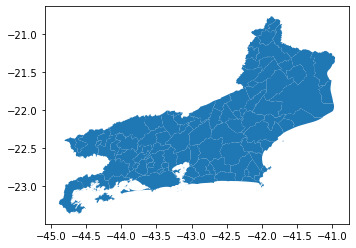

In [5]:
rj.plot()

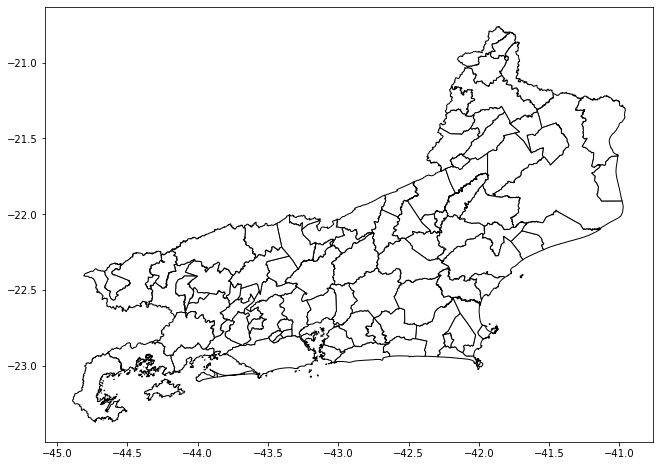

In [6]:
rj.plot(color='white', edgecolor='black', figsize=(15, 8))

## 01.08 Entendendo Polygon, Point e outros shapes

In [7]:
from shapely.geometry import Polygon, Point, LineString, MultiPolygon

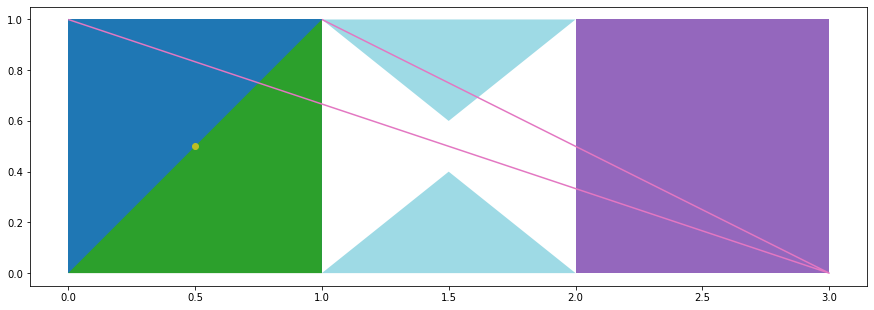

In [8]:
p1 = Polygon([(0, 0), (1,0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1,0), (1, 1)])
p3 = Polygon([(2, 0), (3,0), (3, 1), (2, 1)])

p4 = LineString([(0, 1), (3, 0), (1, 1)])
p5 = Point(0.5, 0.5)

p6 = Polygon([(1, 0), (1.5, 0.4), (2, 0)])
p7 = Polygon([(1, 1), (1.5, 0.6), (2, 1)])

p8 = MultiPolygon([p6, p7])

g = gpd.GeoSeries([p1, p2, p3, p4, p5, p8])
g.plot(cmap='tab20', figsize=(15, 8))

In [9]:
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
3    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
4                              POINT (0.50000 0.50000)
5    MULTIPOLYGON (((1.00000 0.00000, 1.50000 0.400...
dtype: geometry

02.02 Trabalhando com Shapefiles

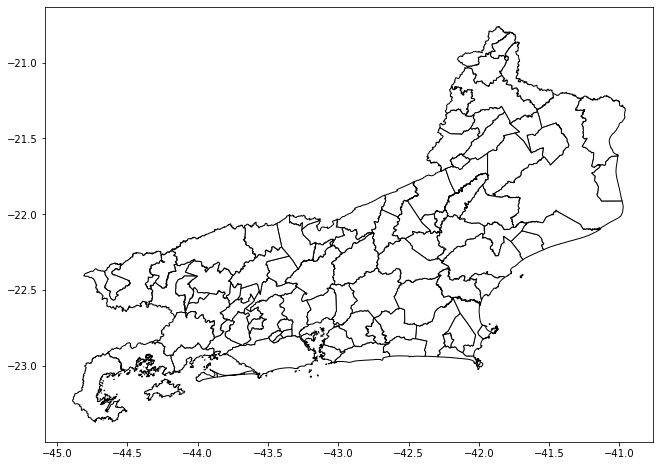

In [10]:
rj.plot(color='white', edgecolor='black', figsize=(15, 8))

Modificando

In [11]:
rj_munic = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO'] 
rj_munic 

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


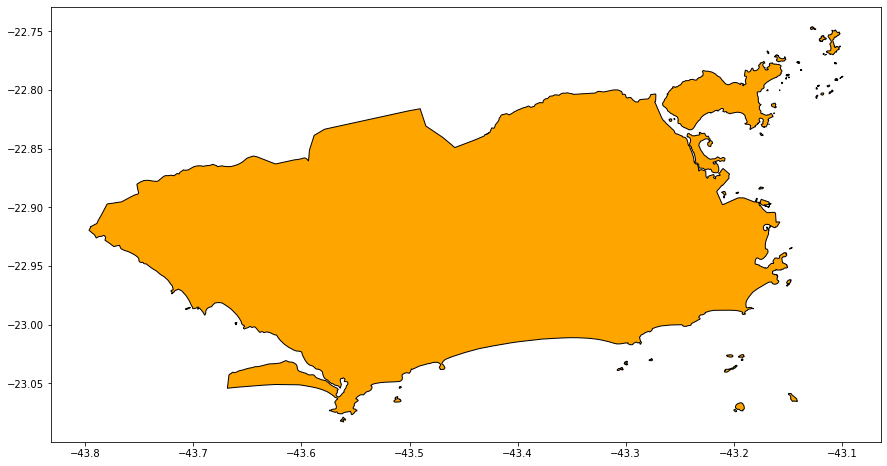

In [13]:
rj_munic.plot(color='orange', edgecolor='black', figsize=(15, 8))

Salvando

In [14]:
import os
dir = 'data/Mapas/RJ-MUNIC'
if not os.path.exists(dir):
    os.makedirs(dir)

In [15]:
rj_munic.to_file(dir + '/RJ-MUNIC.shp')

/home/yorinori/anaconda3/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [16]:
rj_munic2 = gpd.read_file(dir + '/RJ-MUNIC.shp')


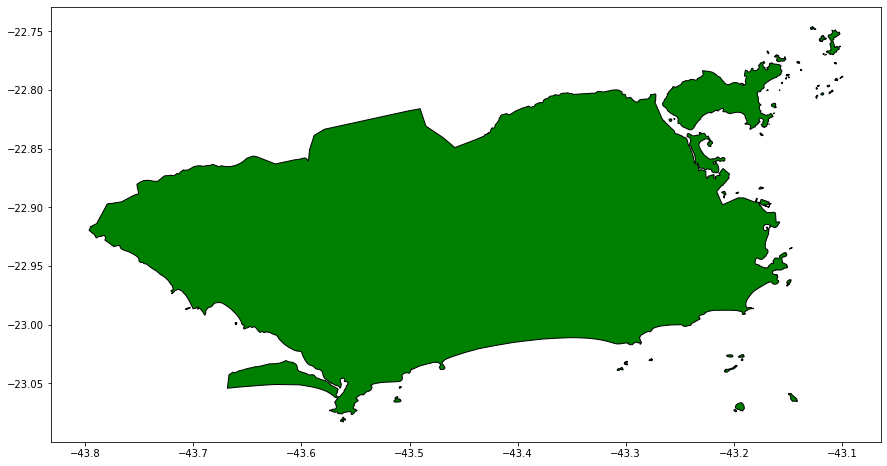

In [17]:
rj_munic2.plot(color='green', edgecolor='black', figsize=(15, 8))